`IRIS FLOWER CLASSIFICATION`

- Iris flower has three species; `setosa, versicolor, and virginica` which differs according to their measurements. 

- Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that 
can learn from the measurements of the iris species and classify them.



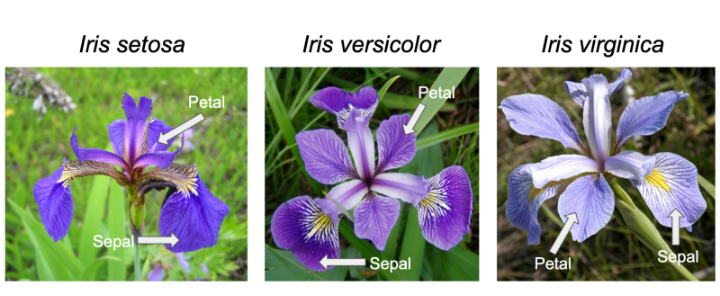

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset
df = pd.read_csv(r'iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df = df.drop(columns='Id')

In [7]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


`DATA CLEANING`

In [8]:
# Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Checking the null values 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# Checking the duplicated
df.duplicated().sum()

3

In [11]:
# Drop the duplicated in the dataset
df.drop_duplicates(inplace=True)

In [12]:
# Checking the shape of the dataset
df.shape

(147, 5)

In [14]:
# Checking the target balanced or not?
df['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

`Exploratory Data Analysis`

In [15]:
# Encoding for the target 
df['Species'] = df['Species'].map({'Iris-versicolor' : 0, 'Iris-virginica' : 1, 'Iris-setosa' : 2})

In [16]:
# Checking the dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


- `Iris-versicolor` : 0

- `Iris-virginica` : 1

- `Iris-setosa` : 2

In [17]:
# Checking the correlation
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,-0.449648
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,0.618214
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,-0.642808
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,-0.572391
Species,-0.449648,0.618214,-0.642808,-0.572391,1.000000


C:\Users\KD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


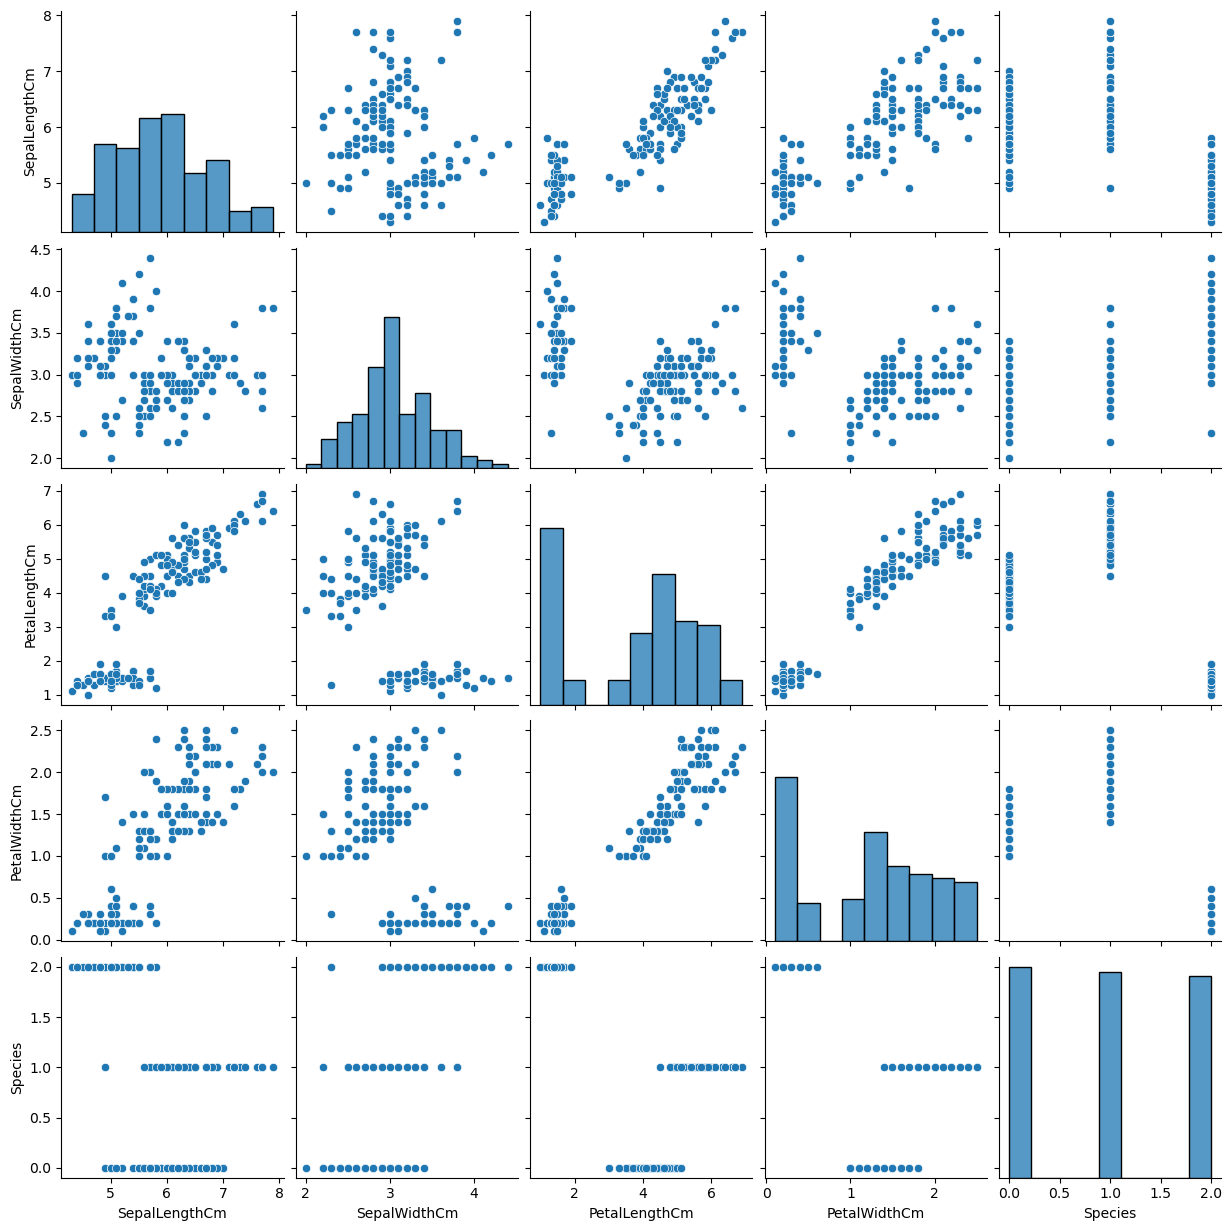

In [18]:
sns.pairplot(df)

C:\Users\KD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


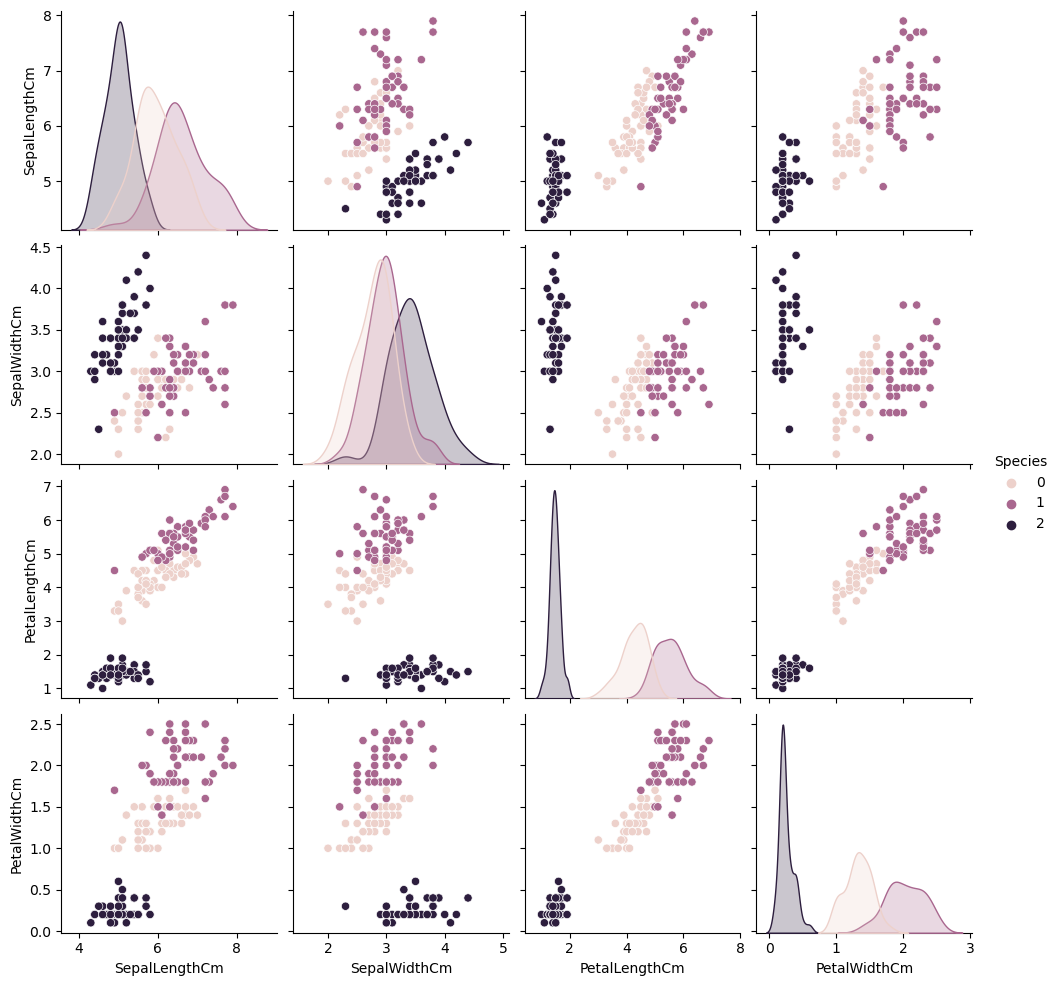

In [19]:
sns.pairplot(df, hue='Species')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

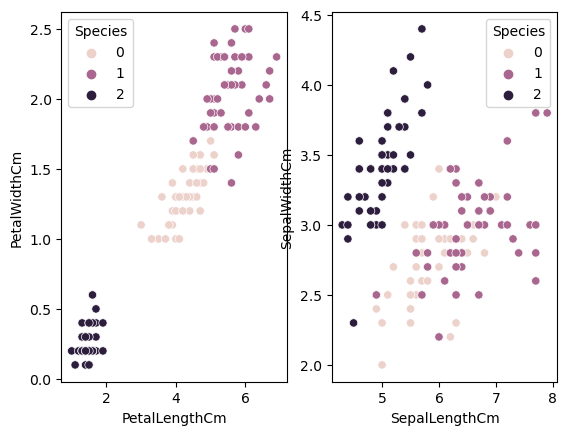

In [20]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(x=df['PetalLengthCm'], y =df['PetalWidthCm'], data = df, ax=ax[0], hue = 'Species')
sns.scatterplot(x=df['SepalLengthCm'], y = df['SepalWidthCm'], data = df, ax=ax[1], hue='Species')

`Data preprocessing`

In [21]:
# Separate features and target
x = df.drop(['Species'], axis = 1)
y = df['Species']

In [22]:
# Train the model
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [23]:
# Model implementation 
from sklearn.svm import SVC 

model = SVC() 

model.fit(x_train, y_train)

SVC()

In [24]:
# Predict the model
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 1, 1, 2, 1], dtype=int64)

In [25]:
## Evaluation measures 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### accuracy 
accuracy_score(y_test, y_pred)

0.9666666666666667

In [26]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 1,  9,  0],
       [ 0,  0,  9]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [29]:
# Now predict the model
input_data = (6.7, 3.3, 5.5, 2.2) 

input_data_array = np.asarray(input_data)

inpt_data_shaped = input_data_array.reshape(1,-1)

predictor = model.predict(inpt_data_shaped)
print(predictor)

if predictor==0: 
    print('Iris-versicolor')
elif predictor == 1: 
    print('Iris-virginica')
else: 
    print('Iris-setosa')

[1]
Iris-virginica


C:\Users\KD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
